In [1]:
import pandas as pd
import numpy as np
import gzip
import json
import matplotlib.pyplot as plt
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)  # Using json.loads instead of eval()

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')



In [2]:
df = getDF('../data/Cell_Phones_and_Accessories_5.json.gz')

In [3]:
df.sample(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
1088758,5.0,True,"09 5, 2017",A10QOWLAY9OJZL,B00O3GVTL6,NaN,Jerry Skelton,charger is perfect and transaction was amazing,Five Stars,1504569600,NaN,NaN
800289,5.0,False,"09 18, 2015",A96K1ZGW56S2I,B0129AD0R8,NaN,tvtv3,"In my opinion, you cant have too many working ...",Works & Easy to Find,1442534400,10,NaN
559899,5.0,True,"05 28, 2015",AYT6Y46TIOYLP,B00NNBQAN4,{'Color:': ' Green'},Decadent Tenshi,I purchased this for my sibling who drop kicke...,Great protection at half the cost.,1432771200,NaN,NaN
274481,5.0,True,"12 29, 2014",A3VNW7LQA4T7XE,B00E0T41JS,{'Color:': ' Heartception'},Shannon,I Love it I ordered on the 17th and they arriv...,Five Stars,1419811200,NaN,NaN
1029436,5.0,True,"09 8, 2009",A1BIPJK03QKFQA,B000FSTKZ8,NaN,QueenOPearls,"Given that information, IF I would have though...",Perfect ~does what it's supposed to do,1252368000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1128437 non-null  float64
 1   verified        1128437 non-null  bool   
 2   reviewTime      1128437 non-null  object 
 3   reviewerID      1128437 non-null  object 
 4   asin            1128437 non-null  object 
 5   style           605241 non-null   object 
 6   reviewerName    1128302 non-null  object 
 7   reviewText      1127672 non-null  object 
 8   summary         1127920 non-null  object 
 9   unixReviewTime  1128437 non-null  int64  
 10  vote            92034 non-null    object 
 11  image           27107 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 104.4+ MB


We see that we have 12 columns in total. We have the star review, whether the review is verified, the review time, ID of reviewer, some keys to link to the product data, the name of the reviewer, the actual text review, the summary review as well as whether their review was marked as helpful, and some images of the product. 

In [5]:
df.isna().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              523196
reviewerName          135
reviewText            765
summary               517
unixReviewTime          0
vote              1036403
image             1101330
dtype: int64

In [6]:
(df.isna().sum())/(df.shape[0])

overall           0.000000
verified          0.000000
reviewTime        0.000000
reviewerID        0.000000
asin              0.000000
style             0.463647
reviewerName      0.000120
reviewText        0.000678
summary           0.000458
unixReviewTime    0.000000
vote              0.918441
image             0.975978
dtype: float64

We see that we have nulls for some reviews as well as other metadata. These will not be helpful for us

In [7]:
df[['overall']].value_counts(normalize=True)

overall
5.0        0.626564
4.0        0.163439
3.0        0.087071
1.0        0.072258
2.0        0.050667
Name: proportion, dtype: float64

In [8]:
df['verified'].value_counts(normalize=True)

verified
True     0.874948
False    0.125052
Name: proportion, dtype: float64

we only want verified reviews, that were given without payment to the reviewer, or extra discount.

Lets make a simplified version of our data containing only rating and text review and summary, including only the verified reviews containing textual data.

Entires with no review won't be too helpful, so we can drop them. 

In [9]:
def simplifyReviews(dataframe):
    '''
    assumes data from amazon reviews, outputs new dataframe with only verified reviews containing overall rating, review and summary

    '''
    out = dataframe.copy()
    out = out[["overall", "verified", "reviewText", "summary"]]
    out = out[out["verified"]==True]
    out = out.drop("verified", axis=1)
    out.info()
    out = out.dropna()
    return out
    

Here is a function that plots the rating distribution of a sample of data it is passed. This will be useful also later.

In [10]:
def rating_distribution(data):

    values, counts = np.unique(data['overall'], return_counts=True)
    normalized_counts = counts/counts.sum()

    plt.figure()
    plt.bar(values, normalized_counts * 100)
    plt.xlabel("Review rating")
    plt.ylabel('% of reviews')
    plt.title("Rating distribution")
    plt.show()
    return normalized_counts
    

In [11]:
# df1 = pd.read_csv("../data/clean_technology_reviews.csv")
# we have already loaded in the technology reviews

In [12]:
df2 = getDF("../data/Office_Products_5.json.gz")


In [13]:
df3 = getDF("../data/Toys_and_Games_5.json.gz")


In [82]:
tech_simple = simplifyReviews(df)
office_simple = simplifyReviews(df2)
toys_simple = simplifyReviews(df3)

<class 'pandas.core.frame.DataFrame'>
Index: 987324 entries, 0 to 1128436
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     987324 non-null  float64
 1   reviewText  986589 non-null  object 
 2   summary     986849 non-null  object 
dtypes: float64(1), object(2)
memory usage: 30.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 710187 entries, 0 to 800356
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     710187 non-null  float64
 1   reviewText  709987 non-null  object 
 2   summary     710066 non-null  object 
dtypes: float64(1), object(2)
memory usage: 21.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 1599831 entries, 0 to 1828970
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   overall     1599831 non-null  float64
 1   reviewText  1598728 no

In [15]:
# Save these as csvs

tech_simple.to_csv("clean_technology_reviews.csv")
office_simple.to_csv("clean_office_reviews.csv")
toys_simple.to_csv("clean_toys_reviews.csv")

In [16]:
# once made as csvs can use these instead:
# df1 = pd.read_csv("../data/clean_technology_reviews.csv")

In [17]:
# df2 = pd.read_csv("../data/clean_office_reviews.csv")


In [18]:
# df3 = getDF("Toys_and_Games_5.json.gz")


In [19]:
tech_simple.sample(5)

,overall,reviewText,summary
1070893,5.0,Very Nice charger for the price,Five Stars
554558,2.0,2 stars means that I don't like it. :) Just t...,Nothing spectacular.
582206,3.0,I have not installed this product on my phone ...,"Good idea, hope it works."
83115,5.0,not as huge as the original OtterBox - but giv...,great iPhone protector
34818,4.0,I've gone through a LOT of bluetooth headsets ...,Works Well


We can read in the data from these csvs in future.
We will analyze the rating distributions of three specific Amazon product categories. We've selected these particular categories because their reviews more accurately reflect sentiments about the actual products, as opposed to categories like books or video games, where reviews might primarily address the content rather than the product itself.

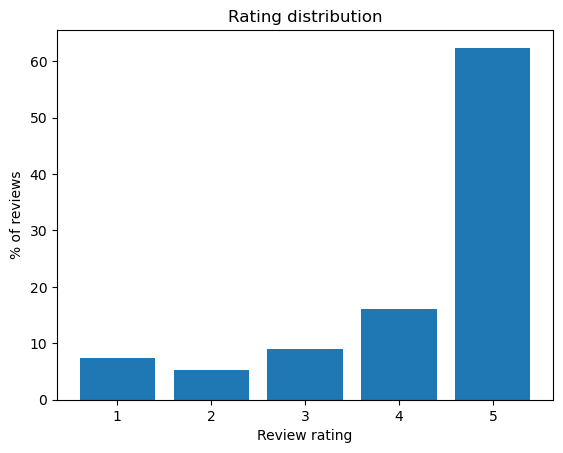

array([0.07475422, 0.05216571, 0.08910983, 0.15997424, 0.62399598])

In [20]:
rating_distribution(tech_simple)

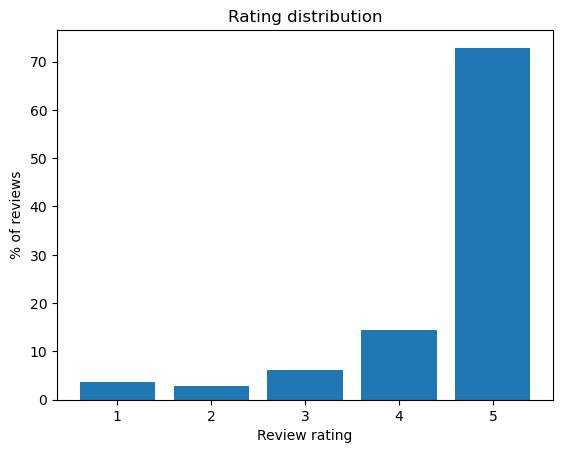

array([0.0365442 , 0.02863442, 0.06099341, 0.14521328, 0.7286147 ])

In [21]:
rating_distribution(office_simple)

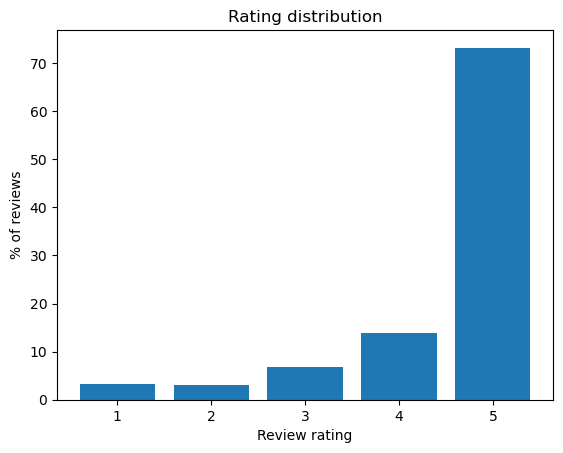

array([0.03177404, 0.02984212, 0.06805442, 0.13868264, 0.73164678])

In [22]:
rating_distribution(toys_simple)

In [23]:
pd.DataFrame(np.unique(tech_simple['overall'], return_counts=True))

,0,1,2,3,4
0,1.0,2.0,3.0,4.0,5.0
1,73720.0,51444.0,87877.0,157761.0,615363.0


In [24]:
pd.DataFrame(np.unique(office_simple['overall'], return_counts=True))

,0,1,2,3,4
0,1.0,2.0,3.0,4.0,5.0
1,25942.0,20327.0,43298.0,103084.0,517229.0


In [25]:
pd.DataFrame(np.unique(toys_simple['overall'], return_counts=True))

,0,1,2,3,4
0,1.0,2.0,3.0,4.0,5.0
1,50788.0,47700.0,108779.0,221672.0,1169473.0


We see that the majority of the reviews are 5 stars, in the tech reviews, "only" 62% are 5 star, so I will use this as it is lowest. For modelling, we will probably 

In [26]:
tech_simple.head(10)


,overall,reviewText,summary
0,5.0,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it
1,5.0,When you don't want to spend a whole lot of ca...,1
2,3.0,"so the case came on time, i love the design. I...",Its okay
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE
4,4.0,"I liked it because it was cute, but the studs ...",Cute!
5,2.0,The product looked exactly like the picture an...,Not so happy
6,3.0,I FINALLY got my case today. It took forever t...,It's cute!
7,5.0,It is a very cute case. None of the jewels hav...,Cute case
8,1.0,DO NOT BUY! this item is seriously cheap as he...,WORST ITEM!
9,4.0,I really love this case... you have to keep yo...,Pretty Cute!


It will be useful to know the length of a review

In [84]:
rev_len = list()
for review in tech_simple["reviewText"]:
    rev_len.append(len(review))

In [85]:
tech_simple["length"] = rev_len

In [86]:
tech_simple["length"].describe()

count    986165.000000
mean        209.004199
std         363.109492
min           1.000000
25%          34.000000
50%         108.000000
75%         240.000000
max       33457.000000
Name: length, dtype: float64

We see that most reviews are between 34 and 240 characters long with a max of 33,457. We will probably not be able to analyse full essays but it will be useful before eliminating any to see if there is a relationship between review length and overall star rating 

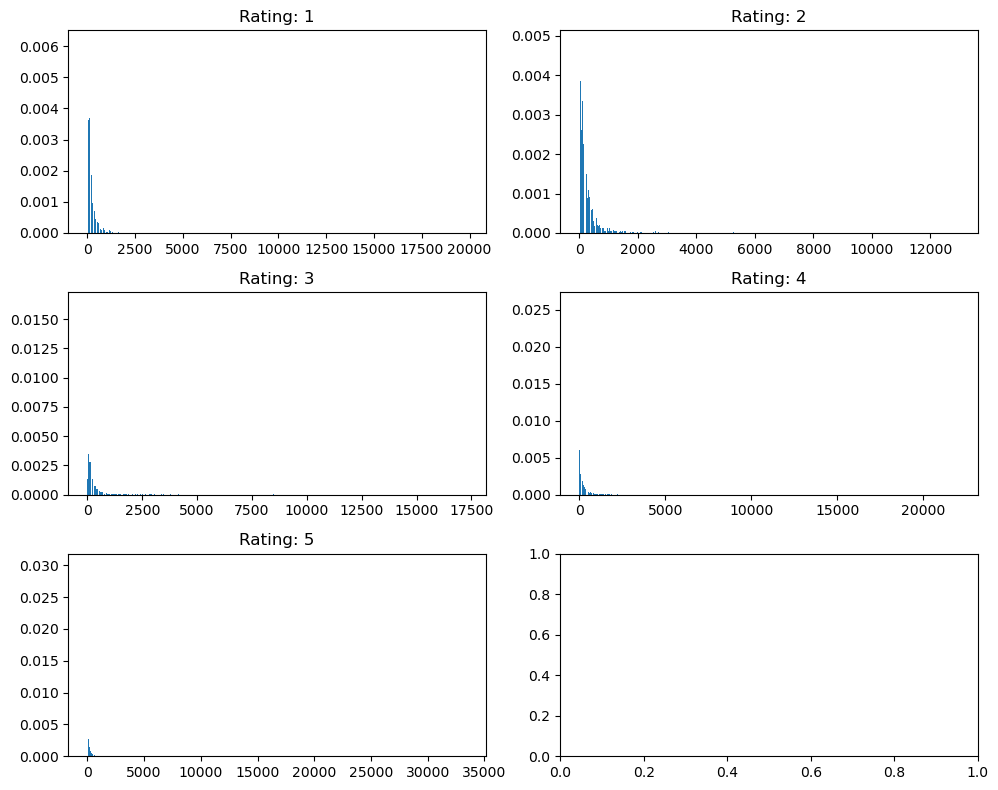

In [89]:
plt.subplots(3,2, figsize=(10,8))
for i in range(1,6):
    len_dist = tech_simple["length"][tech_simple["overall"]==i].value_counts().reset_index()
    len_dist['count_norm']=len_dist['count']/len_dist["count"].sum()
    plt.subplot(3,2,i)
    # plt.bar(len_dist["length"],len_dist['count'])
    plt.bar(len_dist["length"],len_dist['count_norm'])
    plt.title(f"Rating: {i}")
plt.tight_layout()
plt.show()

It is clear we should remove the absolute outliers

In [91]:
tech_simple2 = tech_simple[tech_simple["length"]<=2500].copy()


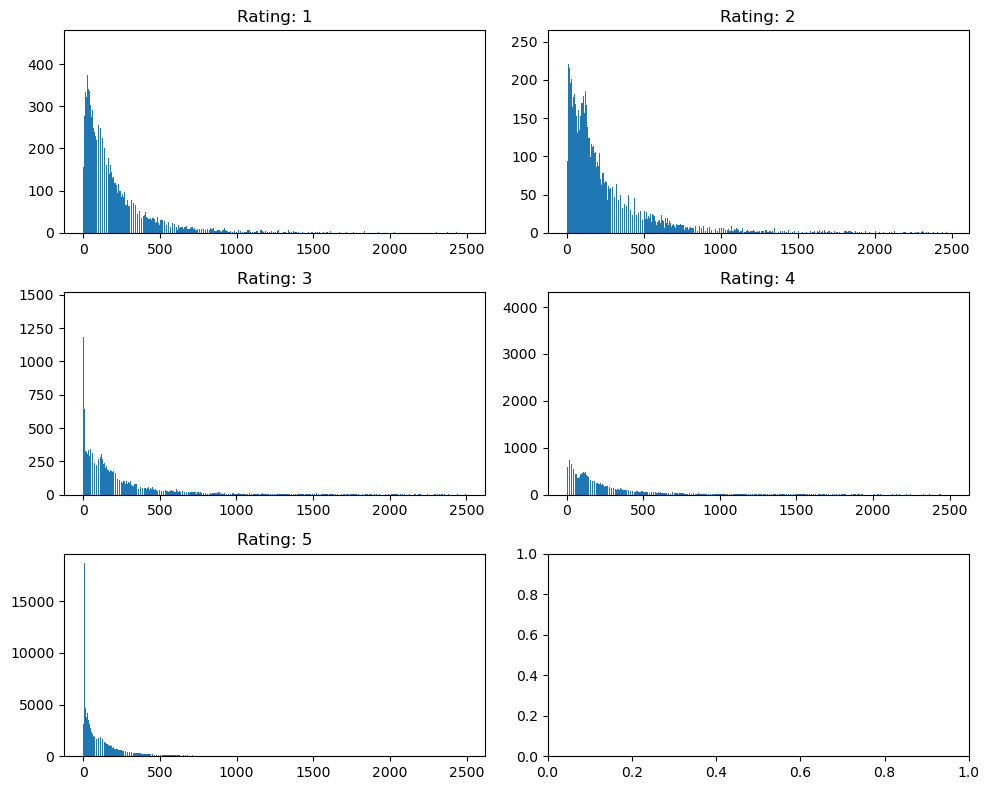

In [97]:
import seaborn as sns
plt.subplots(3,2, figsize=(10,8))
for i in range(1,6):
    len_dist = tech_simple2["length"][tech_simple2["overall"]==i].value_counts().reset_index()
    len_dist['count_norm']=len_dist['count']/len_dist["count"].sum()
    plt.subplot(3,2,i)
    plt.bar(len_dist["length"],len_dist['count'])
    # plt.bar(len_dist["length"],len_dist['count_norm'])
    plt.title(f"Rating: {i}")
plt.tight_layout()
plt.show()

Lets look at how the distribution changes as we reduce total size

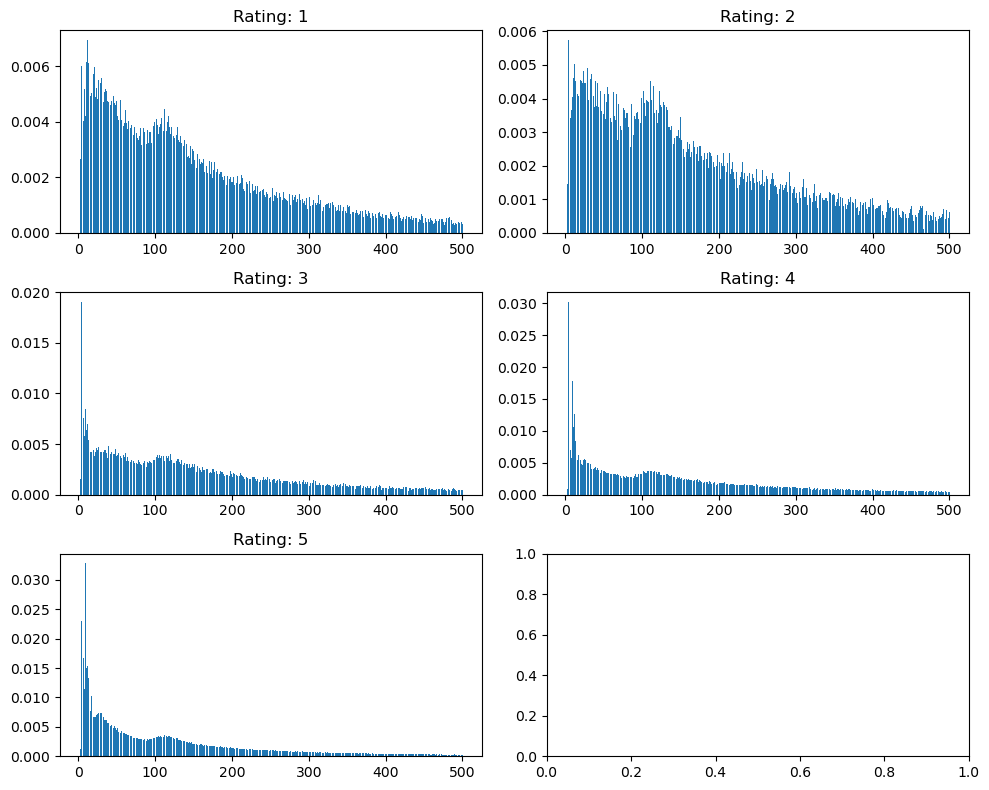

In [98]:
tech_simple3 = tech_simple[tech_simple["length"]<=500].copy()

plt.subplots(3,2, figsize=(10,8))
for i in range(1,6):
    len_dist = tech_simple3["length"][tech_simple3["overall"]==i].value_counts().reset_index()
    len_dist['count_norm']=len_dist['count']/len_dist["count"].sum()
    plt.subplot(3,2,i)
    # plt.bar(len_dist["length"],len_dist['count'])
    plt.bar(len_dist["length"],len_dist['count_norm'])
    plt.title(f"Rating: {i}")
plt.tight_layout()
plt.show()

Ignoring the outliers, the length of reviews seems to follow the same distribution overall regardless of rating. It is important to remember the vast majority of reviews are 5 stars, and we will need to eventually account for this bias in the data when modelling. 

In [116]:
tech_simple3["length"].describe()
short_car = tech_simple3.copy()


In [118]:
short_car

,overall,reviewText,summary,length
0,5.0,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,271
1,5.0,When you don't want to spend a whole lot of ca...,1,102
2,3.0,"so the case came on time, i love the design. I...",Its okay,257
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,92
4,4.0,"I liked it because it was cute, but the studs ...",Cute!,150
...,...,...,...,...
1128429,4.0,Very good cell phone holster. Keeps my phone ...,Four Stars,79
1128430,1.0,Mediocre case protection. Clip is junk. Broke/...,One Star,62
1128431,3.0,my sons likes it. For the price it isn't too bad,Three Stars,48
1128432,4.0,Good for viewing. But doesn't have a button or...,Good,142


In [119]:
l_values, l_counts = np.unique(short_car['length'], return_counts=True)

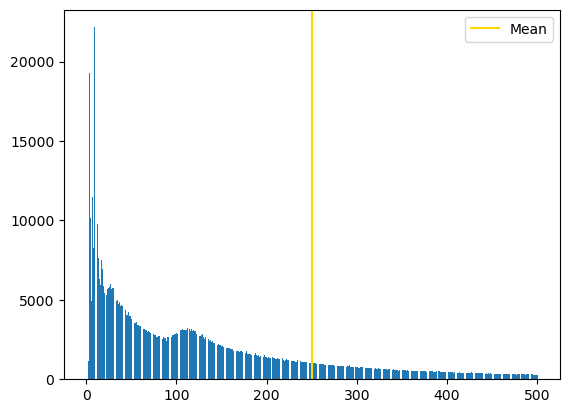

In [120]:
plt.figure()
plt.bar(l_values, l_counts)
plt.axvline(l_values.mean(), color='gold', label="Mean")

plt.legend()
plt.show()

In [121]:
# tokenising the reviews:
short_car['reviewText'].str.split(' ')

0          [Looks, even, better, in, person., Be, careful...
1          [When, you, don't, want, to, spend, a, whole, ...
2          [so, the, case, came, on, time,, i, love, the,...
3          [DON'T, CARE, FOR, IT., , GAVE, IT, AS, A, GIF...
4          [I, liked, it, because, it, was, cute,, but, t...
                                 ...                        
1128429    [Very, good, cell, phone, holster., , Keeps, m...
1128430    [Mediocre, case, protection., Clip, is, junk.,...
1128431    [my, sons, likes, it., For, the, price, it, is...
1128432    [Good, for, viewing., But, doesn't, have, a, b...
1128436                                        [i, love, it]
Name: reviewText, Length: 890444, dtype: object

In [123]:
short_car['reviewText'] = short_car['reviewText'].str.lower()
# short_car['reviewText'] = short_car['reviewText'].str.replace("[^a-z']", " ")


## First attempt at vectorising the text
We have not removed stop words etc and we also have many many spelling mistakes. I will show the full extent then for a first pass remove any tokens not in the english language.

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [149]:
def bow_review(review): 
    # 1. Instantiate 
    bagofwords = CountVectorizer()

    # 2. Fit 
    bagofwords.fit(review['reviewText'])

    # 3. Transform
    small_transformed = bagofwords.transform(review['reviewText'])
    small_transformed
    return(bagofwords, small_transformed)
bow_short, s_transformed_short = bow_review(short_car)

In [138]:
# these are now the features, they are the individual tokens
# bagofwords.get_feature_names()

bow_short.get_feature_names()
corpus2 = bow_short.get_feature_names()
# converting the sparse matrix into a numpy array
# small_transformed.toarray()
print(s_transformed_short.shape[0] * s_transformed_short.shape[1] * s_transformed_short.dtype.itemsize / 1e6)
print(s_transformed_short.shape)

503065.24224
(890444, 70620)


In [126]:
term_frequencies = s_transformed_short.sum(axis=0)
term_frequencies.shape

(1, 70620)

In [139]:
corpus2[10:30]

['000mah',
 '000milliamp',
 '000x',
 '001',
 '002',
 '002mah',
 '003070',
 '004',
 '005v',
 '007',
 '009',
 '00am',
 '00ma',
 '00pm',
 '00usd',
 '01',
 '010',
 '0100',
 '011935003731469',
 '012']

We will discard all tokens not in english language


In [131]:
import nltk
nltk.download('words')



[nltk_data] Downloading package words to /Users/edo/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [145]:
english_words = set(nltk.corpus.words.words())
unrecognized_tokens = [token for token in corpus2 if token.lower() not in english_words]
num_unrec = len(unrecognized_tokens)
num_unrec/len(corpus2)

0.7415179835740583

In [156]:
short_car2 = short_car.copy()
short_car2['reviewText'] = short_car2['reviewText'].str.replace("[^a-z']", " ")

short_car2

,overall,reviewText,summary,length
0,5.0,looks even better in person. be careful to not...,Can't stop won't stop looking at it,271
1,5.0,when you don't want to spend a whole lot of ca...,1,102
2,3.0,"so the case came on time, i love the design. i...",Its okay,257
3,2.0,don't care for it. gave it as a gift and they...,CASE,92
4,4.0,"i liked it because it was cute, but the studs ...",Cute!,150
...,...,...,...,...
1128429,4.0,very good cell phone holster. keeps my phone ...,Four Stars,79
1128430,1.0,mediocre case protection. clip is junk. broke/...,One Star,62
1128431,3.0,my sons likes it. for the price it isn't too bad,Three Stars,48
1128432,4.0,good for viewing. but doesn't have a button or...,Good,142


In [153]:
bow_short2, s_transformed_short2 = bow_review(short_car2)

In [151]:
# these are now the features, they are the individual tokens
# bagofwords.get_feature_names()

bow_short2.get_feature_names()
corpus3 = bow_short2.get_feature_names()
# converting the sparse matrix into a numpy array
# small_transformed.toarray()
print(s_transformed_short2.shape[0] * s_transformed_short2.shape[1] * s_transformed_short2.dtype.itemsize / 1e6)
print(s_transformed_short2.shape)

503065.24224
(890444, 70620)


In [152]:
corpus3

['00',
 '000',
 '0000',
 '000000',
 '00001',
 '0002',
 '000ah',
 '000amh',
 '000amp',
 '000ma',
 '000mah',
 '000milliamp',
 '000x',
 '001',
 '002',
 '002mah',
 '003070',
 '004',
 '005v',
 '007',
 '009',
 '00am',
 '00ma',
 '00pm',
 '00usd',
 '01',
 '010',
 '0100',
 '011935003731469',
 '012',
 '013',
 '0155379',
 '0155669',
 '01890',
 '01but',
 '01c',
 '01gb',
 '01gsnrxqtus',
 '01nov',
 '01pm',
 '01ww',
 '01yqnqz69vs',
 '02',
 '0224',
 '025',
 '0251',
 '02mbps',
 '02mm',
 '02nd',
 '02r',
 '03',
 '030',
 '0385344554',
 '03rd',
 '04',
 '0401',
 '05',
 '050',
 '050mah',
 '0530',
 '05a',
 '05mm',
 '05th',
 '05v',
 '06',
 '060',
 '0600',
 '06b',
 '06bd0vfavbx3se9j1hdw',
 '06mb',
 '07',
 '0700',
 '077',
 '07jul',
 '08',
 '08mm',
 '09',
 '0900',
 '0_0',
 '0_o',
 '0a',
 '0amp',
 '0amps',
 '0c',
 '0ce',
 '0db',
 '0f',
 '0ff',
 '0ghz',
 '0h9ne',
 '0hone',
 '0ii',
 '0ijhvnq8',
 '0inch',
 '0k',
 '0m',
 '0ma',
 '0mah',
 '0mha',
 '0ne',
 '0nly',
 '0ok',
 '0onnector',
 '0qc',
 '0r',
 '0s',
 '0th8j2h1p4

In [134]:
from collections import Counter
unrecognized_token_freq = Counter(unrecognized_tokens)
unrecognized_freq = {token: freq for token, freq in unrecognized_token_freq.items() if token in unrecognized_tokens}


In [137]:
# from sklearn.utils import resample
# subset_transformed = resample(s_transformed_short, n_samples=1000, random_state=42, replace=False)
# subset_transformed.todense()
# # fre = pd.DataFrame(columns=bagofwords.get_feature_names(), data=subset_transformed.todense())
# # display(free)


['believe',
 'believed',
 'believer',
 'believes',
 'believing',
 'belikn',
 'belip',
 'belisismo',
 'belit',
 'belittle',
 'belive',
 'beliver',
 'belize',
 'belk',
 'belken',
 'belkeve',
 'belkin',
 'belking',
 'belkins',
 'bell',
 'bella',
 'belle',
 'bellevue',
 'belleza',
 'bellied',
 'bellies',
 'bellisimo',
 'bellisssimo',
 'bellkin',
 'bello',
 'bellow',
 'bellroy',
 'bells',
 'bellt',
 'belly',
 'belong',
 'belonged',
 'belonging',
 'belongings',
 'belongs',
 'beloved',
 'beloving',
 'below',
 'belows',
 'belreak',
 'belst',
 'belt',
 'belta',
 'beltcase',
 'beltclip',
 'beltclips',
 'belted',
 'beltholder',
 'beltline',
 'beltloop',
 'beltron',
 'belts',
 'beluga',
 'bely',
 'beminimal',
 'bemt',
 'bemused',
 'bemz',
 'ben',
 'bench',
 'benched',
 'benches',
 'benching',
 'benchmade',
 'benchmark',
 'benchmarked',
 'benchmarking',
 'benchmarks',
 'bend',
 'bendability',
 'bendable',
 'bended',
 'bender',
 'bendgate',
 'bendind',
 'bending',
 'bends',
 'bendy',
 'bene',
 'bene

## Cleaning the text data 

In [130]:
bow_short2, s_transformed_short2 = bow_review(short_car)

In [140]:
corpus2 = bow_short2.get_feature_names()
corpus2[50:60]


['0hone', '0k', '0m', '0nly', '0ok', '0onnector', '0qc', '0s', '0v', '0ver']

In [132]:
import re
short_car['reviewText'] = short_car['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if not re.search(r'\d', word)))


/var/folders/z_/0wg44qzj7zzg40_5yymhjxm40000gn/T/ipykernel_47862/1725954875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_car['reviewText'] = short_car['reviewText'].apply(lambda x: ' '.join(word for word in x.split() if not re.search(r'\d', word)))


In [135]:
bow_short3, s_transformed_short3 = bow_review(short_car)


AttributeError: 'CountVectorizer' object has no attribute 'shape'

In [136]:
s_transformed_short3.shape

(740668, 47431)

In [139]:
corpus3 = bow_short3.get_feature_names()
corpus3[10:100]

['_hakflduayk',
 '_including',
 '_indostructable_',
 '_innergear',
 '_lot_',
 '_not_',
 '_ontar',
 '_precisely_',
 '_really_',
 '_slip__',
 '_ss',
 'a_',
 'a_s',
 'aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaa',
 'aaaaaand',
 'aaaaammmmaaaaazzzziiiiinnnngggg',
 'aaaaand',
 'aaaah',
 'aaaahhhhh',
 'aaaamazon',
 'aaaannnhhh',
 'aaaass',
 'aaagood',
 'aaas',
 'aabout',
 'aabsolutely',
 'aacute',
 'aadhesive',
 'aaf',
 'aagin',
 'aah',
 'aahs',
 'aall',
 'aalso',
 'aam',
 'aamazon',
 'aame',
 'aand',
 'aaply',
 'aapop',
 'aaps',
 'aare',
 'aargh',
 'aarived',
 'aaron',
 'aas',
 'aatter',
 'aawesome',
 'aaxa',
 'ab',
 'aback',
 'abacus',
 'abad',
 'abajo',
 'abandon',
 'abandoned',
 'abandoning',
 'abating',
 'abattery',
 'abbreviated',
 'abby',
 'abc',
 'abcs',
 'abd',
 'abe',
 'aberration',
 'aberrations',
 'abest',
 'abet',
 'abetted',
 'abetter',
 'abhor',
 'abide',
 'abiertas',


In [181]:
def fragmenter(corp):
    corpus_length = len(corp)
    corpus_length = round(corpus_length,-2)
    batch = int(corpus_length/1000)+1
    corpus_dict = {}
    for i in range(1,batch+2):
        corpus_dict[i] = corp[(i-1)*1000:i*1000]
    return corpus_dict, batch

frag_corpus2, batch2 = fragmenter(corpus2)
frag_corpus2[1]



['00',
 '000',
 '0000',
 '000000',
 '000amh',
 '000amp',
 '000ma',
 '000mah',
 '001',
 '002',
 '004',
 '007',
 '00am',
 '00ma',
 '00pm',
 '01',
 '010',
 '0100',
 '011935003731469',
 '0155379',
 '01890',
 '01c',
 '01pm',
 '02',
 '025',
 '0251',
 '02mm',
 '03',
 '04',
 '0401',
 '05',
 '050',
 '050mah',
 '05v',
 '06',
 '060',
 '06mb',
 '07',
 '08',
 '08mm',
 '09',
 '0a',
 '0amp',
 '0amps',
 '0c',
 '0ce',
 '0db',
 '0f',
 '0ff',
 '0h9ne',
 '0hone',
 '0k',
 '0m',
 '0nly',
 '0ok',
 '0onnector',
 '0qc',
 '0s',
 '0v',
 '0ver',
 '0vrg',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '10000ma',
 '10000mah',
 '10000x',
 '1000ma',
 '1000mah',
 '1000rf6',
 '1000s',
 '1000stars',
 '1000x',
 '10050',
 '10050mah',
 '100betterthan',
 '100deg',
 '100ma',
 '100mah',
 '100mb',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100times',
 '100w',
 '100x',
 '101',
 '1010ma',
 '1016',
 '101th',
 '102',
 '1020',
 '103',
 '1036',
 '103yo',
 '1040',
 '10400',
 '10400ma',
 '10400mah',
 '105',
 '106f',
